### Лабораторная работа № 1. 
### Выполнил: Бочарин Максим Александрович
### Учебная группа: 18-АС
### 5 Вариант
### Набор данных: 5 ( how-much-did-it-rain-ii )




In [1]:
!pip install -q --upgrade ipython
!pip install -q --upgrade ipykernel
!pip install -U keras-tuner
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
drive.mount('/content/drive')

     |████████████████████████████████| 788kB 2.9MB/s 
     |████████████████████████████████| 358kB 19.5MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.8 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.16.1 which is incompatible.
     |████████████████████████████████| 122kB 2.7MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.8 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.3.4 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.16.1 which is incompatible.
     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=624f52a7476f864871e1f63f500c979bf33103b49cf342f8c10517880c3e6558
  Stored in

In [2]:
# Type declairation to minimize RAM consumption
col_list = ['minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th',
       'Ref_5x5_50th', 'Ref_5x5_90th', 'RefComposite', 'RefComposite_5x5_10th',
       'RefComposite_5x5_50th', 'RefComposite_5x5_90th', 'RhoHV',
       'RhoHV_5x5_10th', 'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr',
       'Zdr_5x5_10th', 'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th', 'Expected']
d = {c : np.float32 for c in col_list}

In [3]:
train = pd.read_csv("/content/drive/My Drive/train.csv", dtype=d)
train

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1,1,16.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
2,1,25.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
3,1,35.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
4,1,45.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13765196,1180945,38.0,9.0,33.0,19.5,25.5,36.5,33.0,20.5,28.0,36.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.636004
13765197,1180945,42.0,9.0,33.0,21.0,30.5,37.0,36.5,22.0,33.5,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.636004
13765198,1180945,47.0,9.0,29.5,10.0,26.0,30.5,31.0,16.5,26.0,33.0,1.041667,NaN,1.025000,1.051667,1.75,NaN,0.750,3.0000,13.379990,NaN,NaN,13.379990,8.636004
13765199,1180945,52.0,9.0,19.0,NaN,15.5,26.5,19.0,NaN,16.5,26.5,NaN,NaN,NaN,1.051667,NaN,NaN,NaN,2.8125,NaN,NaN,NaN,NaN,8.636004


In [4]:
train.keys()

Index(['Id', 'minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th',
       'Ref_5x5_50th', 'Ref_5x5_90th', 'RefComposite', 'RefComposite_5x5_10th',
       'RefComposite_5x5_50th', 'RefComposite_5x5_90th', 'RhoHV',
       'RhoHV_5x5_10th', 'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr',
       'Zdr_5x5_10th', 'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th', 'Expected'],
      dtype='object')

In [5]:
train.isna().sum()

Id                              0
minutes_past                    0
radardist_km                    0
Ref                       7415826
Ref_5x5_10th              8481213
Ref_5x5_50th              7408719
Ref_5x5_90th              6213920
RefComposite              7048858
RefComposite_5x5_10th     8009528
RefComposite_5x5_50th     7053538
RefComposite_5x5_90th     5935998
RhoHV                     8830285
RhoHV_5x5_10th            9632047
RhoHV_5x5_50th            8828633
RhoHV_5x5_90th            7859617
Zdr                       8830285
Zdr_5x5_10th              9632047
Zdr_5x5_50th              8828633
Zdr_5x5_90th              7859617
Kdp                       9582566
Kdp_5x5_10th             10336419
Kdp_5x5_50th              9577920
Kdp_5x5_90th              8712425
Expected                        0
dtype: int64

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
train.fillna(0, inplace=True)
train[["minutes_past", "radardist_km", "Expected"]].describe()

,minutes_past,radardist_km,Expected
count,13765201.000,13765201.000,13765201.000
mean,29.369,11.292,106.863
std,17.194,4.125,540.209
min,0.000,0.000,0.010
25%,15.000,9.000,0.254
50%,30.000,11.000,1.016
75%,44.000,14.000,3.810
max,59.000,21.000,33017.730


In [8]:
corr_mat = train.corr()
corr_mat.style.background_gradient(cmap='coolwarm')

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,1.000000,0.000514,0.003874,-0.010577,-0.011334,-0.010932,-0.009910,-0.012159,-0.013284,-0.012517,-0.011188,-0.004624,-0.007220,-0.004547,-0.001478,-0.002670,-0.003655,-0.007619,0.001580,0.000041,0.001653,-0.003456,0.002538,-0.001001
minutes_past,0.000514,1.000000,-0.001427,-0.011614,-0.007743,-0.011593,-0.015758,-0.014512,-0.010894,-0.014680,-0.018467,-0.003200,-0.003235,-0.003421,-0.002519,-0.001356,-0.000818,-0.003054,-0.000466,-0.000161,0.001268,0.000066,-0.001285,-0.000179
radardist_km,0.003874,-0.001427,1.000000,-0.300683,-0.294634,-0.305001,-0.320501,-0.354872,-0.358491,-0.359383,-0.362857,-0.440054,-0.406637,-0.445148,-0.479317,-0.205561,0.158697,-0.279073,-0.423519,-0.005695,0.159554,0.014708,-0.159615,0.106751
Ref,-0.010577,-0.011614,-0.300683,1.000000,0.926147,0.977953,0.935131,0.968278,0.922837,0.956721,0.911712,0.490526,0.503913,0.499322,0.475961,0.108119,-0.184197,0.166418,0.258770,0.003863,-0.350176,-0.029754,0.314141,-0.132867
Ref_5x5_10th,-0.011334,-0.007743,-0.294634,0.926147,1.000000,0.942866,0.863288,0.901493,0.964706,0.913786,0.839783,0.498631,0.525569,0.507391,0.471193,0.104753,-0.175550,0.169607,0.240681,0.004144,-0.365590,-0.019644,0.316078,-0.116487
Ref_5x5_50th,-0.010932,-0.011593,-0.305001,0.977953,0.942866,1.000000,0.946179,0.960922,0.942049,0.976204,0.922953,0.502835,0.517781,0.512031,0.486409,0.110008,-0.188316,0.170700,0.262296,0.003868,-0.360177,-0.030541,0.322815,-0.134032
Ref_5x5_90th,-0.009910,-0.015758,-0.320501,0.935131,0.863288,0.946179,1.000000,0.937114,0.879933,0.946205,0.979760,0.501041,0.501338,0.509967,0.499701,0.117354,-0.198739,0.169889,0.289926,0.003674,-0.347284,-0.039263,0.321919,-0.153962
RefComposite,-0.012159,-0.014512,-0.354872,0.968278,0.901493,0.960922,0.937114,1.000000,0.939021,0.982837,0.943340,0.513693,0.524046,0.523081,0.501411,0.122585,-0.193539,0.186792,0.286601,0.003060,-0.353181,-0.032450,0.317077,-0.140775
RefComposite_5x5_10th,-0.013284,-0.010894,-0.358491,0.922837,0.964706,0.942049,0.879933,0.939021,1.000000,0.952372,0.879946,0.525702,0.549326,0.535389,0.500445,0.122196,-0.188575,0.196385,0.273359,0.003186,-0.368504,-0.024002,0.319885,-0.125988
RefComposite_5x5_50th,-0.012517,-0.014680,-0.359383,0.956721,0.913786,0.976204,0.946205,0.982837,0.952372,1.000000,0.951126,0.523809,0.535215,0.533567,0.510104,0.124426,-0.197589,0.190562,0.290385,0.003142,-0.360899,-0.033039,0.323661,-0.141698


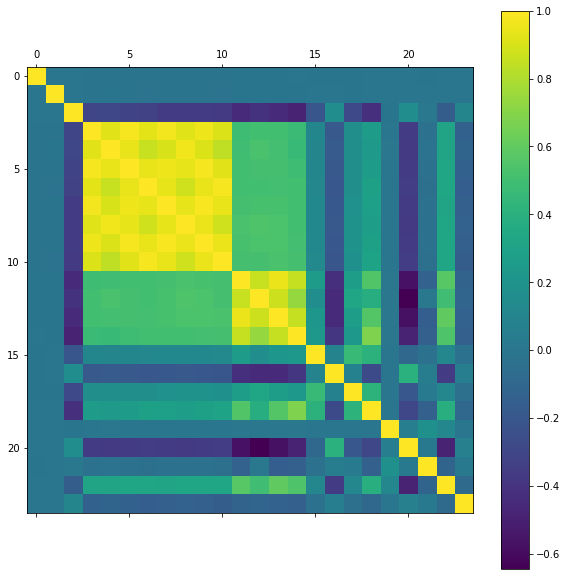

In [9]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(10, 10))
plt.matshow(corr_mat, fignum=f.number)
plt.colorbar()

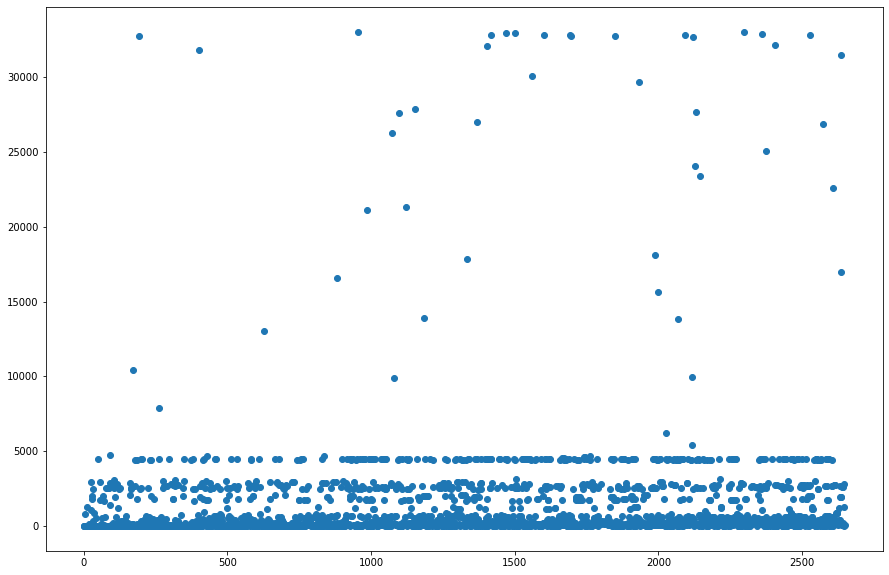

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.scatter(np.arange(len(train["Expected"].unique())), train["Expected"].unique())

(array([2.392e+03, 2.130e+02, 2.000e+00, 3.000e+00, 3.000e+00, 4.000e+00,
        3.000e+00, 4.000e+00, 6.000e+00, 1.900e+01]),
 array([1.0000005e-02, 3.3017820e+03, 6.6035542e+03, 9.9053262e+03,
        1.3207099e+04, 1.6508871e+04, 1.9810643e+04, 2.3112414e+04,
        2.6414186e+04, 2.9715959e+04, 3.3017730e+04], dtype=float32),
 <a list of 10 Patch objects>)

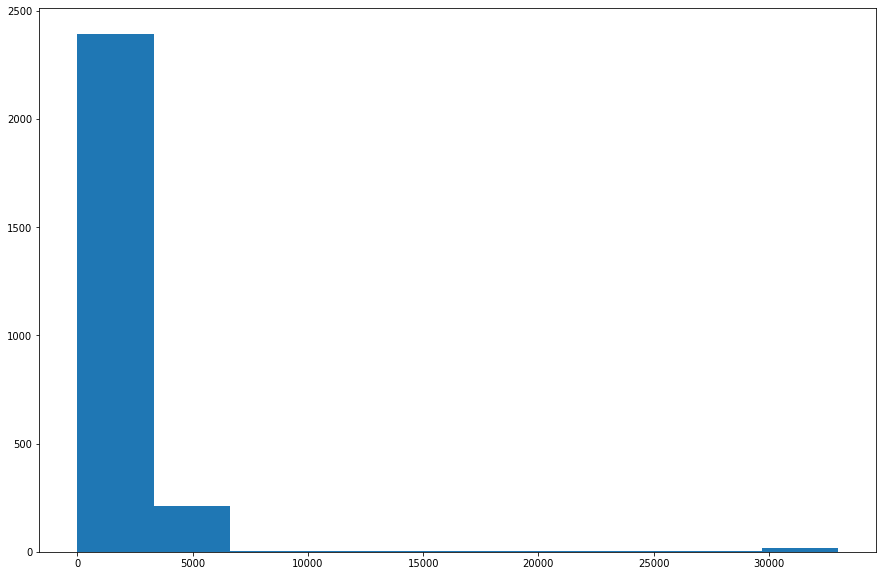

In [11]:
plt.figure(figsize=(15, 10))
plt.hist(train["Expected"].unique())

In [12]:
from scipy import stats

print(stats.percentileofscore(train["Expected"], 106))

92.94511573060211


In [13]:
train.drop(train[train["Expected"] >= 106].index, inplace=True)
train

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
1,1,16.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
2,1,25.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
3,1,35.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
4,1,45.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13765196,1180945,38.000,9.000,33.000,19.500,25.500,36.500,33.000,20.500,28.000,36.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.636
13765197,1180945,42.000,9.000,33.000,21.000,30.500,37.000,36.500,22.000,33.500,37.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.636
13765198,1180945,47.000,9.000,29.500,10.000,26.000,30.500,31.000,16.500,26.000,33.000,1.042,0.000,1.025,1.052,1.750,0.000,0.750,3.000,13.380,0.000,0.000,13.380,8.636
13765199,1180945,52.000,9.000,19.000,0.000,15.500,26.500,19.000,0.000,16.500,26.500,0.000,0.000,0.000,1.052,0.000,0.000,0.000,2.812,0.000,0.000,0.000,0.000,8.636


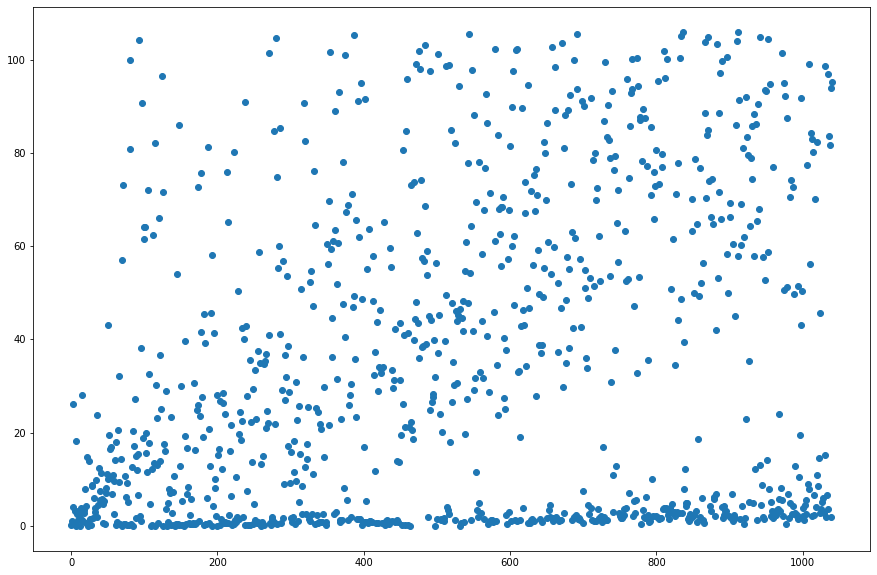

In [14]:
plt.figure(figsize=(15, 10))
plt.scatter(np.arange(len(train["Expected"].unique())), train["Expected"].unique())

(array([437.,  86.,  77.,  70.,  72.,  69.,  61.,  58.,  58.,  53.]),
 array([1.0000005e-02, 1.0600806e+01, 2.1191612e+01, 3.1782417e+01,
        4.2373222e+01, 5.2964031e+01, 6.3554836e+01, 7.4145645e+01,
        8.4736450e+01, 9.5327255e+01, 1.0591806e+02], dtype=float32),
 <a list of 10 Patch objects>)

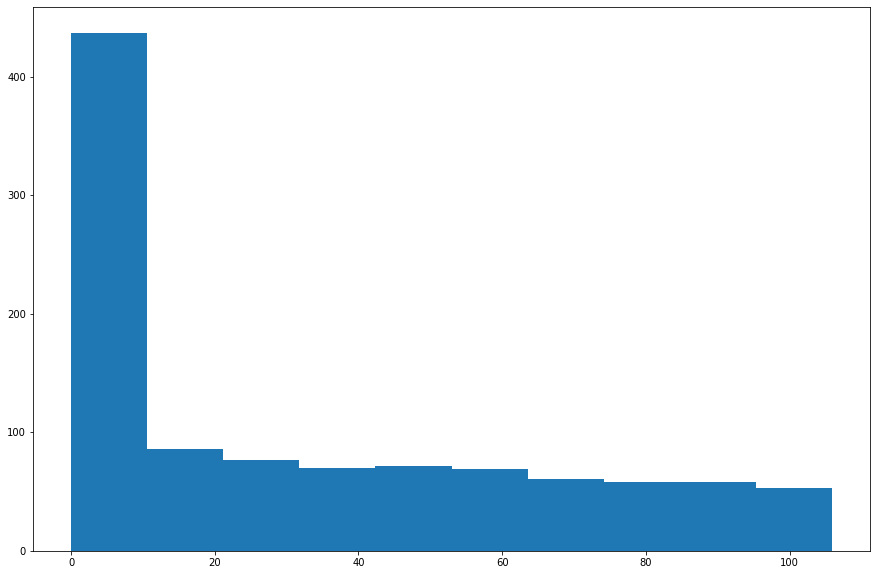

In [15]:
plt.figure(figsize=(15, 10))
plt.hist(train["Expected"].unique())

In [16]:
train_grouped = train.groupby('Id')
target = pd.DataFrame(train_grouped['Expected'].mean()) # mean, or any value, since they are the same in a group

In [17]:
target.reset_index(inplace=True)
target = target["Expected"]
target

0          0.254
1          1.016
2         26.162
3          4.064
4          0.254
           ...  
1080138    0.508
1080139    1.524
1080140    0.254
1080141    3.556
1080142    8.636
Name: Expected, Length: 1080143, dtype: float32

In [18]:
def pad_series(X, target_len=19):
    seq_len = X.shape[0]
    pad_size = target_len-seq_len
    if (pad_size > 0):
        X = np.pad(X, ((0,pad_size), (0,0)), 'constant', constant_values=0.)
    return X, seq_len

In [19]:
INPUT_WIDTH = 19
data_size = len(train_grouped)
X_train = np.empty((data_size, INPUT_WIDTH, 22))
seq_lengths = np.zeros(data_size)
y_train = np.zeros(data_size)

i = 0
for _, group in train_grouped:
    X = group.values
    seq_len = X.shape[0]
    X_train[i,:seq_len,:] = X[:,1:23]
    y_train[i] = X[0,23]
    i += 1
    del X
    
del train_grouped

In [20]:
X_train.shape

(1080143, 19, 22)

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(X_train, target, random_state=42, shuffle=True)

In [24]:
import tensorflow as tf

del X_train
del target

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
train_data = train_data.batch(32)
valid_data = valid_data.batch(32)

# del x_train
# del x_valid
# del y_train
# del y_valid

In [25]:
import tensorflow as tf

def create_model(shape=(19, 22)):
    tfkl = tf.keras.layers
    model = tf.keras.Sequential([
        tfkl.Bidirectional((tfkl.LSTM(128, return_sequences=True)), input_shape=shape),
        tfkl.Bidirectional(tfkl.LSTM(64)),
        tfkl.Dense(64, activation="linear"),
        tfkl.Dense(1, activation="linear")
    ])
    
    model.compile(loss='mean_absolute_error', optimizer="adam")
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 19, 256)           154624    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 327,297
Trainable params: 327,297
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_data, epochs=100, validation_data=valid_data, #epochs=100
          callbacks=[tf.keras.callbacks.ReduceLROnPlateau(), 
                    tf.keras.callbacks.EarlyStopping(patience = 10),
                    tf.keras.callbacks.ModelCheckpoint("model.h5", save_best_only=True)])

In [27]:
col_list.pop()
d = {c: np.float32 for c in col_list}

test = pd.read_csv("/content/drive/My Drive/test.csv", dtype=d)
test[test.columns[1:]] = test[test.columns[1:]].astype(np.float32)
test_ids = test['Id'].unique()

# Convert all NaNs to zero
test = test.reset_index(drop=True)
test.fillna(0.0, inplace=True)
test_groups = test.groupby("Id")
test_size = len(test_groups)

X_test = np.zeros((test_size, INPUT_WIDTH, 22), dtype=np.float32)

i = 0
for _, group in test_groups:
    X = group.values
    seq_len = X.shape[0]
    X_test[i,:seq_len,:] = X[:,1:23]
    i += 1
    del X
    
del test_groups
X_test.shape

In [ ]:
submission = pd.read_csv("/content/drive/My Drive/sample_solution.csv")
submission

In [ ]:
model.load_weights("/content/drive/My Drive/model.h5")
# model.load_weights("/model.h5")
predictions = model.predict(X_test, batch_size=32)
predictions = model.predict(x_test, batch_size=32)
# submission["Expected"] = predictions
# submission.to_csv("submission.csv", index=False)

In [ ]:
del submission["Id"]
del X_test

In [ ]:
submission = submission.to_numpy()

In [ ]:
pred = []
val = []
for x in predictions:
  pred.append(x[0])

for y in submission:
  val.append(y[0])

del predictions, submission

Correlation Coefficient: 0.8002462626990675

In [ ]:
cc = np.corrcoef(pred, val)
ccc = cc[0][1]
print(f'Correlation Coefficient: {ccc}')
# pred = model.predict(x_test)
# predicted_x = np.reshape(pred, (pred.shape[0]))
# predicted_y = np.reshape(y_test, (y_test.shape[0]))
# cc = np.corrcoef(predicted_x, predicted_y)
# ccc = cc[0][1]
# print(f'Correlation Coefficient: {ccc}')

+Keras

In [ ]:
def build_model(hp):
  hidden_layers = hp.Choice('hidden_layers', values=[1,2,3])
  activation_choice = hp.Choice('activation', values=['relu', 'selu', 'elu'])
  model = Sequential()
  model.add(Dense(units=hp.Int('units',min_value=256,max_value=5059,step=768),activation=activation_choice, input_shape=(x_train.shape[1], )))
  model.add(Dropout(0.3))
  for i in range(hidden_layers):
    model.add(Dense(units=hp.Int(f'layer_{i}_units_',min_value=237//(i+1), max_value=1264//(i+1),step=316//(i+1)),activation=activation_choice))
  model.add(Dense(1))  
  model.compile(optimizer='rmsprop', loss="mse", metrics=["mae"])
  return model

In [ ]:
! rm -rf untitled_project/

In [ ]:
def find_best_NN(x_train, y_train):
  # создаю тюнер, который сможет подобрать оптимальную архитектуру модели
  tuner = RandomSearch(build_model, objective="val_mae", max_trials=40, executions_per_trial=1,)
  print("\n\n\n")
  # начинается автоматический подбор гиперпараметров
  print('[INFO] start searching')
  tuner.search(x_train, y_train, batch_size=32, epochs=150, validation_split=0.3)
  # выбираем лучшую модель
  print("\n\n\nRESULTS SUMMARY")
  tuner.results_summary()
  print("\n\n\n")
  # получаем лучшую модель
  print("\n\n\nHERE IS THE BEST MODEL\n\n\n")
  best_params = tuner.get_best_hyperparameters()[0]
  best_model = tuner.hypermodel.build(best_params)
  best_model.summary()
  return best_model

best_model = find_best_NN(x_train, y_train)

In [ ]:
best_history = best_model.fit(x_train, y_train, epochs=150, batch_size=500, validation_split=0.3)
best_history = best_history.history

In [ ]:
graphs(best_history)

In [ ]:
kpredicted_x = best_model.predict(x_test)
kpredicted_x = np.reshape(kpredicted_x, (kpredicted_x.shape[0]))

In [ ]:
KK = np.corrcoef(kpredicted_x, y_test)
KK = KK[0][1]
print(f'My model Correlation Coefficient: {ccc}')
print(f'Keras Correlation Coefficient: {KK}')